# Importing & Understanding Data

In [1]:
# Import important libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
boombikes = pd.read_csv("day.csv")
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
boombikes.shape

(730, 16)

In [4]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Correcting data types

boombikes[["instant","season","yr","mnth","holiday","weekday","workingday","weathersit"]] = boombikes[["instant","season","yr","mnth","holiday","weekday","workingday","weathersit"]].astype(object)
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    object 
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 91.4+ KB


In [7]:
    # Mapping string values to categorical columns

boombikes["season"] = boombikes["season"].replace({1:'Spring',2:"Summer",3:"Fall",4:"Winter"})
boombikes["mnth"] = boombikes["mnth"].replace({1:'January',2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})
boombikes["weekday"] = boombikes["weekday"].replace({0:"Sunday",1:'Monday',2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
boombikes["weathersit"] = boombikes["weathersit"].replace({1:"Clear",2:"Mist",3:"Light Snow",4:"Heavy Rain"})
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Visualizing the data

<Figure size 1296x864 with 0 Axes>

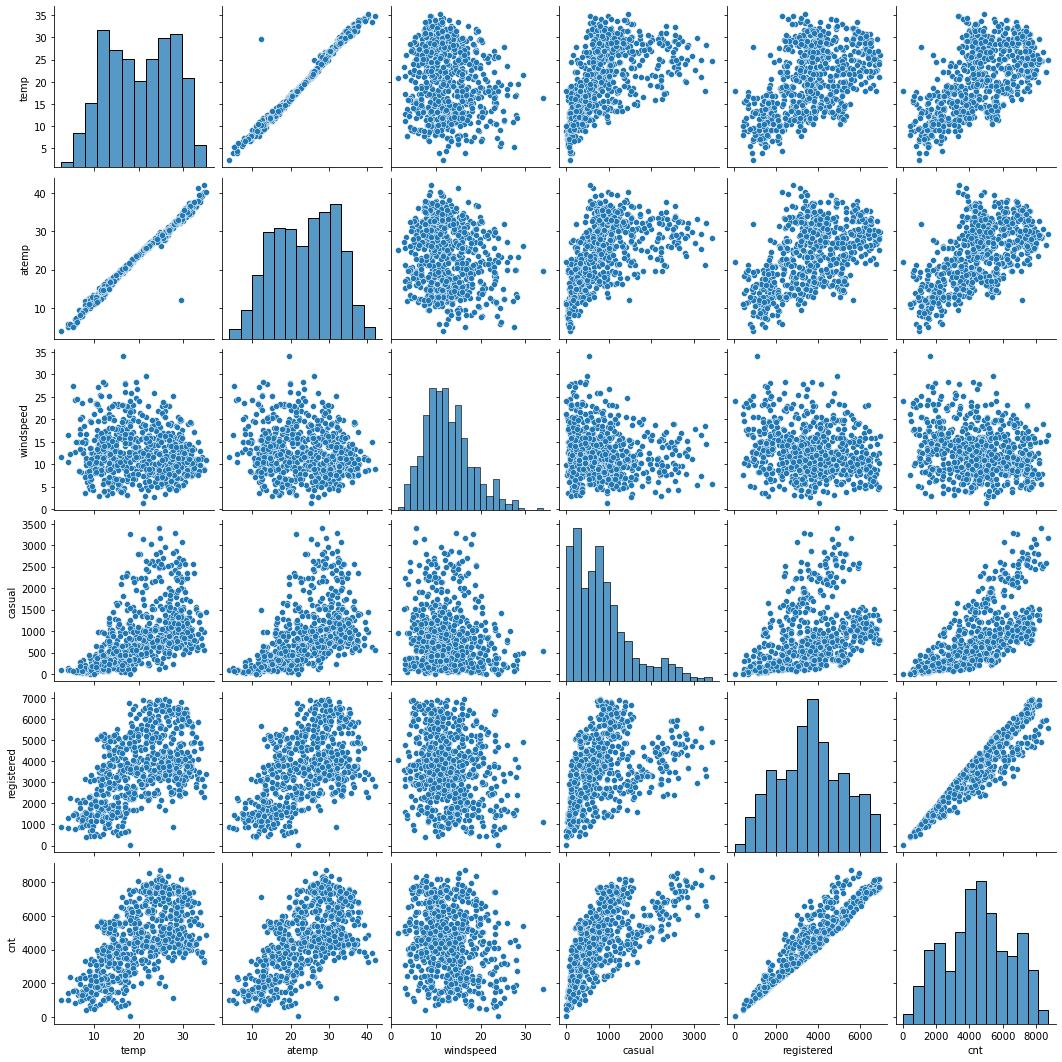

In [8]:
#Visualizing numerical variables
plt.figure(figsize=(18,12))
sns.pairplot(boombikes[['temp','atemp','windspeed', 'casual','registered', 'cnt']])
plt.show()

## 1. temp & atemp follow a very similar distribution so we sill use atemp since it would affect the customers choice more than the actual temperature

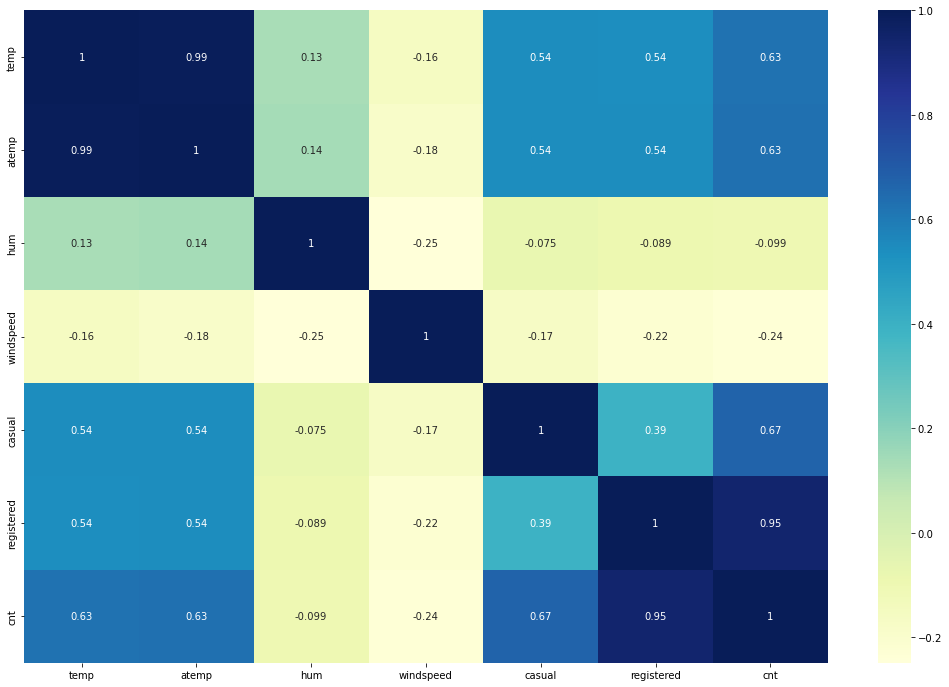

In [9]:
#To check correlations between numerical variables
plt.figure(figsize=(18,12))
sns.heatmap(boombikes.corr(),annot=True, cmap="YlGnBu")
plt.show()

# Following can be seen from above:
## 1. atemp and temp are highly correlated with cnt
## 2. casual and registered are highly correlated with cnt which is expected since casual+registered= cnt

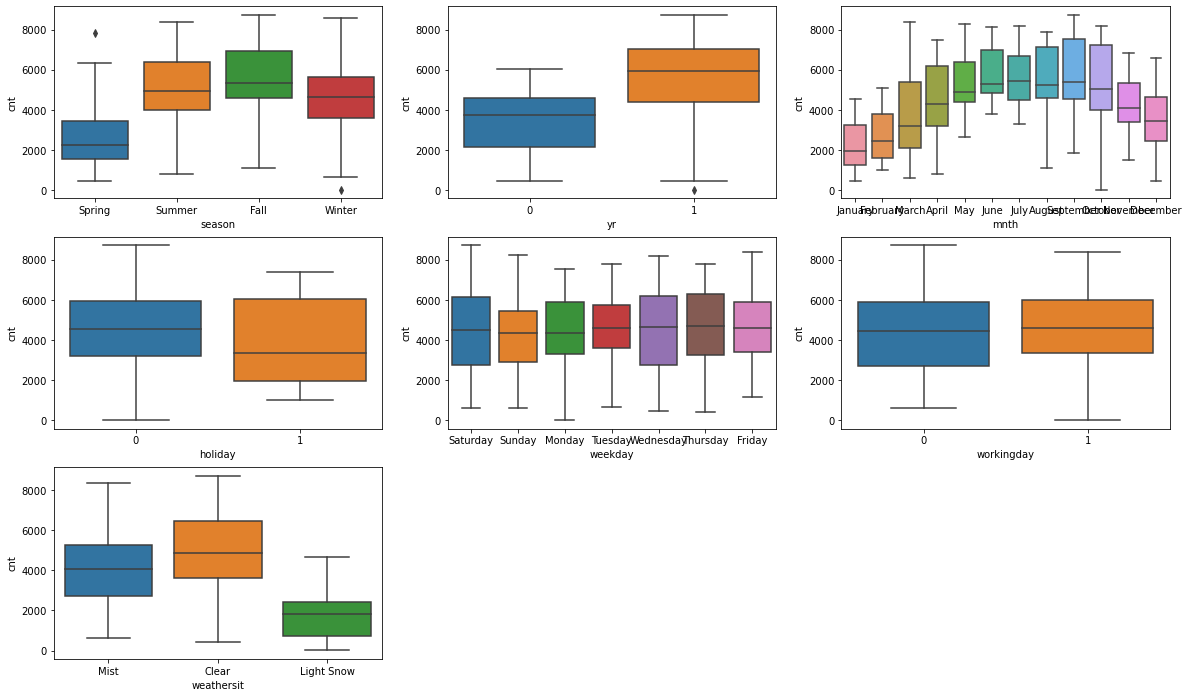

In [10]:
#visualization of categorical variables using boxplot
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data = boombikes)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data = boombikes)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data = boombikes)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data = boombikes)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data = boombikes)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data = boombikes)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data = boombikes)
plt.show()

1. Most bikes are rented in Fall season and in the year 2019
2. May to October period most bikes are rented
3. Most bikes were rented in mist and cloudy weather and least when light rain or snow

## Data Preperation for Modelling

In [11]:
#drop insignificant columns
boombikes.drop(['instant', 'dteday', 'temp', 'casual', 'registered'], axis = 1, inplace = True)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600


In [12]:
  #Creating dummy variables for categorical variables
boombikes1 = pd.get_dummies(boombikes, columns= ['season', 'mnth', 'weekday', 'weathersit' ], drop_first=True)
boombikes1.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
#changing datatypes to numeric
boombikes1 = boombikes1.apply(pd.to_numeric)
boombikes1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   atemp                  730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    int64  
 7   season_Spring          730 non-null    uint8  
 8   season_Summer          730 non-null    uint8  
 9   season_Winter          730 non-null    uint8  
 10  mnth_August            730 non-null    uint8  
 11  mnth_December          730 non-null    uint8  
 12  mnth_February          730 non-null    uint8  
 13  mnth_January           730 non-null    uint8  
 14  mnth_July              730 non-null    uint8  
 15  mnth_J

Splitting the data into Training and Testing Sets

In [14]:
boombikes_train, boombikes_test = train_test_split(boombikes1, train_size=0.7, test_size=0.3, random_state=100)
print(boombikes_train.shape)
print(boombikes_test.shape)

(510, 29)
(219, 29)


# Rescaling Data

## We will use MinMaxscaler

In [15]:
scaler = MinMaxScaler()

#creating list of numeric variables
num_vars=['atemp', 'hum', 'windspeed', 'cnt']

#fit on data
boombikes_train[num_vars]= scaler.fit_transform(boombikes_train[num_vars])
boombikes_train.head()


,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## Dividing boombikes_train into x & y for model building

In [16]:
y_train = boombikes_train.pop('cnt')
x_train = boombikes_train

## Model Building

In [17]:
#Running RFE with output number of variables as 15

lm = LinearRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_November', 'mnth_September', 'weekday_Saturday',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [18]:
x_train.columns[~rfe.support_]

Index(['workingday', 'season_Summer', 'mnth_August', 'mnth_February',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_October', 'weekday_Monday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

## Building model using statsmodel

In [19]:
#creating x_test dataframe with RFE selected variables
x_train_rfe = x_train[col]
x_train_rfe.head()

,yr,holiday,atemp,hum,windspeed,season_Spring,season_Winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weekday_Saturday,weathersit_Light Snow,weathersit_Mist
653,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,0,0.766351,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,1,0,1
728,1,0,0.200348,0.498067,0.663106,1,0,1,0,0,0,0,0,0,0
482,1,0,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,1,0,1


In [20]:
#Adding a constant variable
import statsmodels.api as sm

x_train_rfe = sm.add_constant(x_train_rfe)

In [21]:
#Running the linear model
lm = sm.OLS(y_train, x_train_rfe).fit()

In [22]:
#Summary of Linear Model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          9.67e-187
Time:                        21:55:22   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

In [23]:
# Dropping constant

x_train_rfe = x_train_rfe.drop(['const'], axis=1)

## Rebuilding the model after dropping weekday_Saturday

In [24]:
x_train_new = x_train_rfe.drop(['weekday_Saturday'], axis=1)

In [25]:
x_train_lm = sm.add_constant(x_train_new)

In [26]:
lm = sm.OLS(y_train, x_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          2.58e-187
Time:                        21:55:22   Log-Likelihood:                 507.48
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

In [27]:
x_train_new.columns

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_November', 'mnth_September', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [28]:
#checking VIF for all variables in new model

vif=pd.DataFrame()
x= x_train_new
vif['Features']= x.columns
vif['VIF']= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.83
4,windspeed,4.00
6,season_Winter,2.93
5,season_Spring,2.89
13,weathersit_Mist,2.26
0,yr,2.06
10,mnth_November,1.82
8,mnth_January,1.75
7,mnth_December,1.54


## Rebuilding model after dropping hum

In [29]:
x_train_new = x_train_new.drop(['hum'], axis=1)
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train, x_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          3.95e-185
Time:                        21:55:22   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [30]:
#checking VIF for all variables in new model

vif=pd.DataFrame()
x= x_train_new
vif['Features']= x.columns
vif['VIF']= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,atemp,4.57
3,windspeed,3.95
5,season_Winter,2.55
4,season_Spring,2.35
0,yr,2.06
9,mnth_November,1.80
7,mnth_January,1.65
12,weathersit_Mist,1.53
6,mnth_December,1.46
8,mnth_July,1.35


Residual Analysis

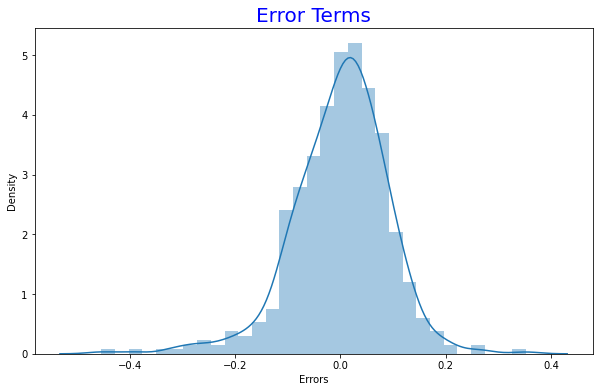

In [31]:
#Creating y_train_pred
plt.figure(figsize=(10,6))
y_train_pred = lm.predict(x_train_lm)

#Finding residuals
res= y_train - y_train_pred

#Visualizing distribution of residuals

sns.distplot(res)
plt.xlabel("Errors")
plt.title('Error Terms', fontdict={'fontsize': 20, 'color': 'Blue'})
plt.show()

#The residual value is centered around zero and follows Normal Distribution. Hence the model is valid.

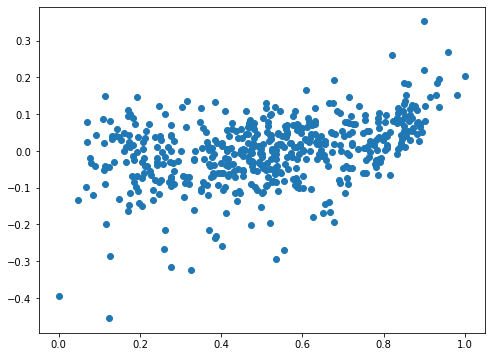

In [32]:
#To check if error terms are independent of each other
plt.figure(figsize=(8,6))
plt.scatter(y_train, res)
plt.show()

From the above it is clear that residulas does not have sort of pattern, so the error terms are independent of each other.

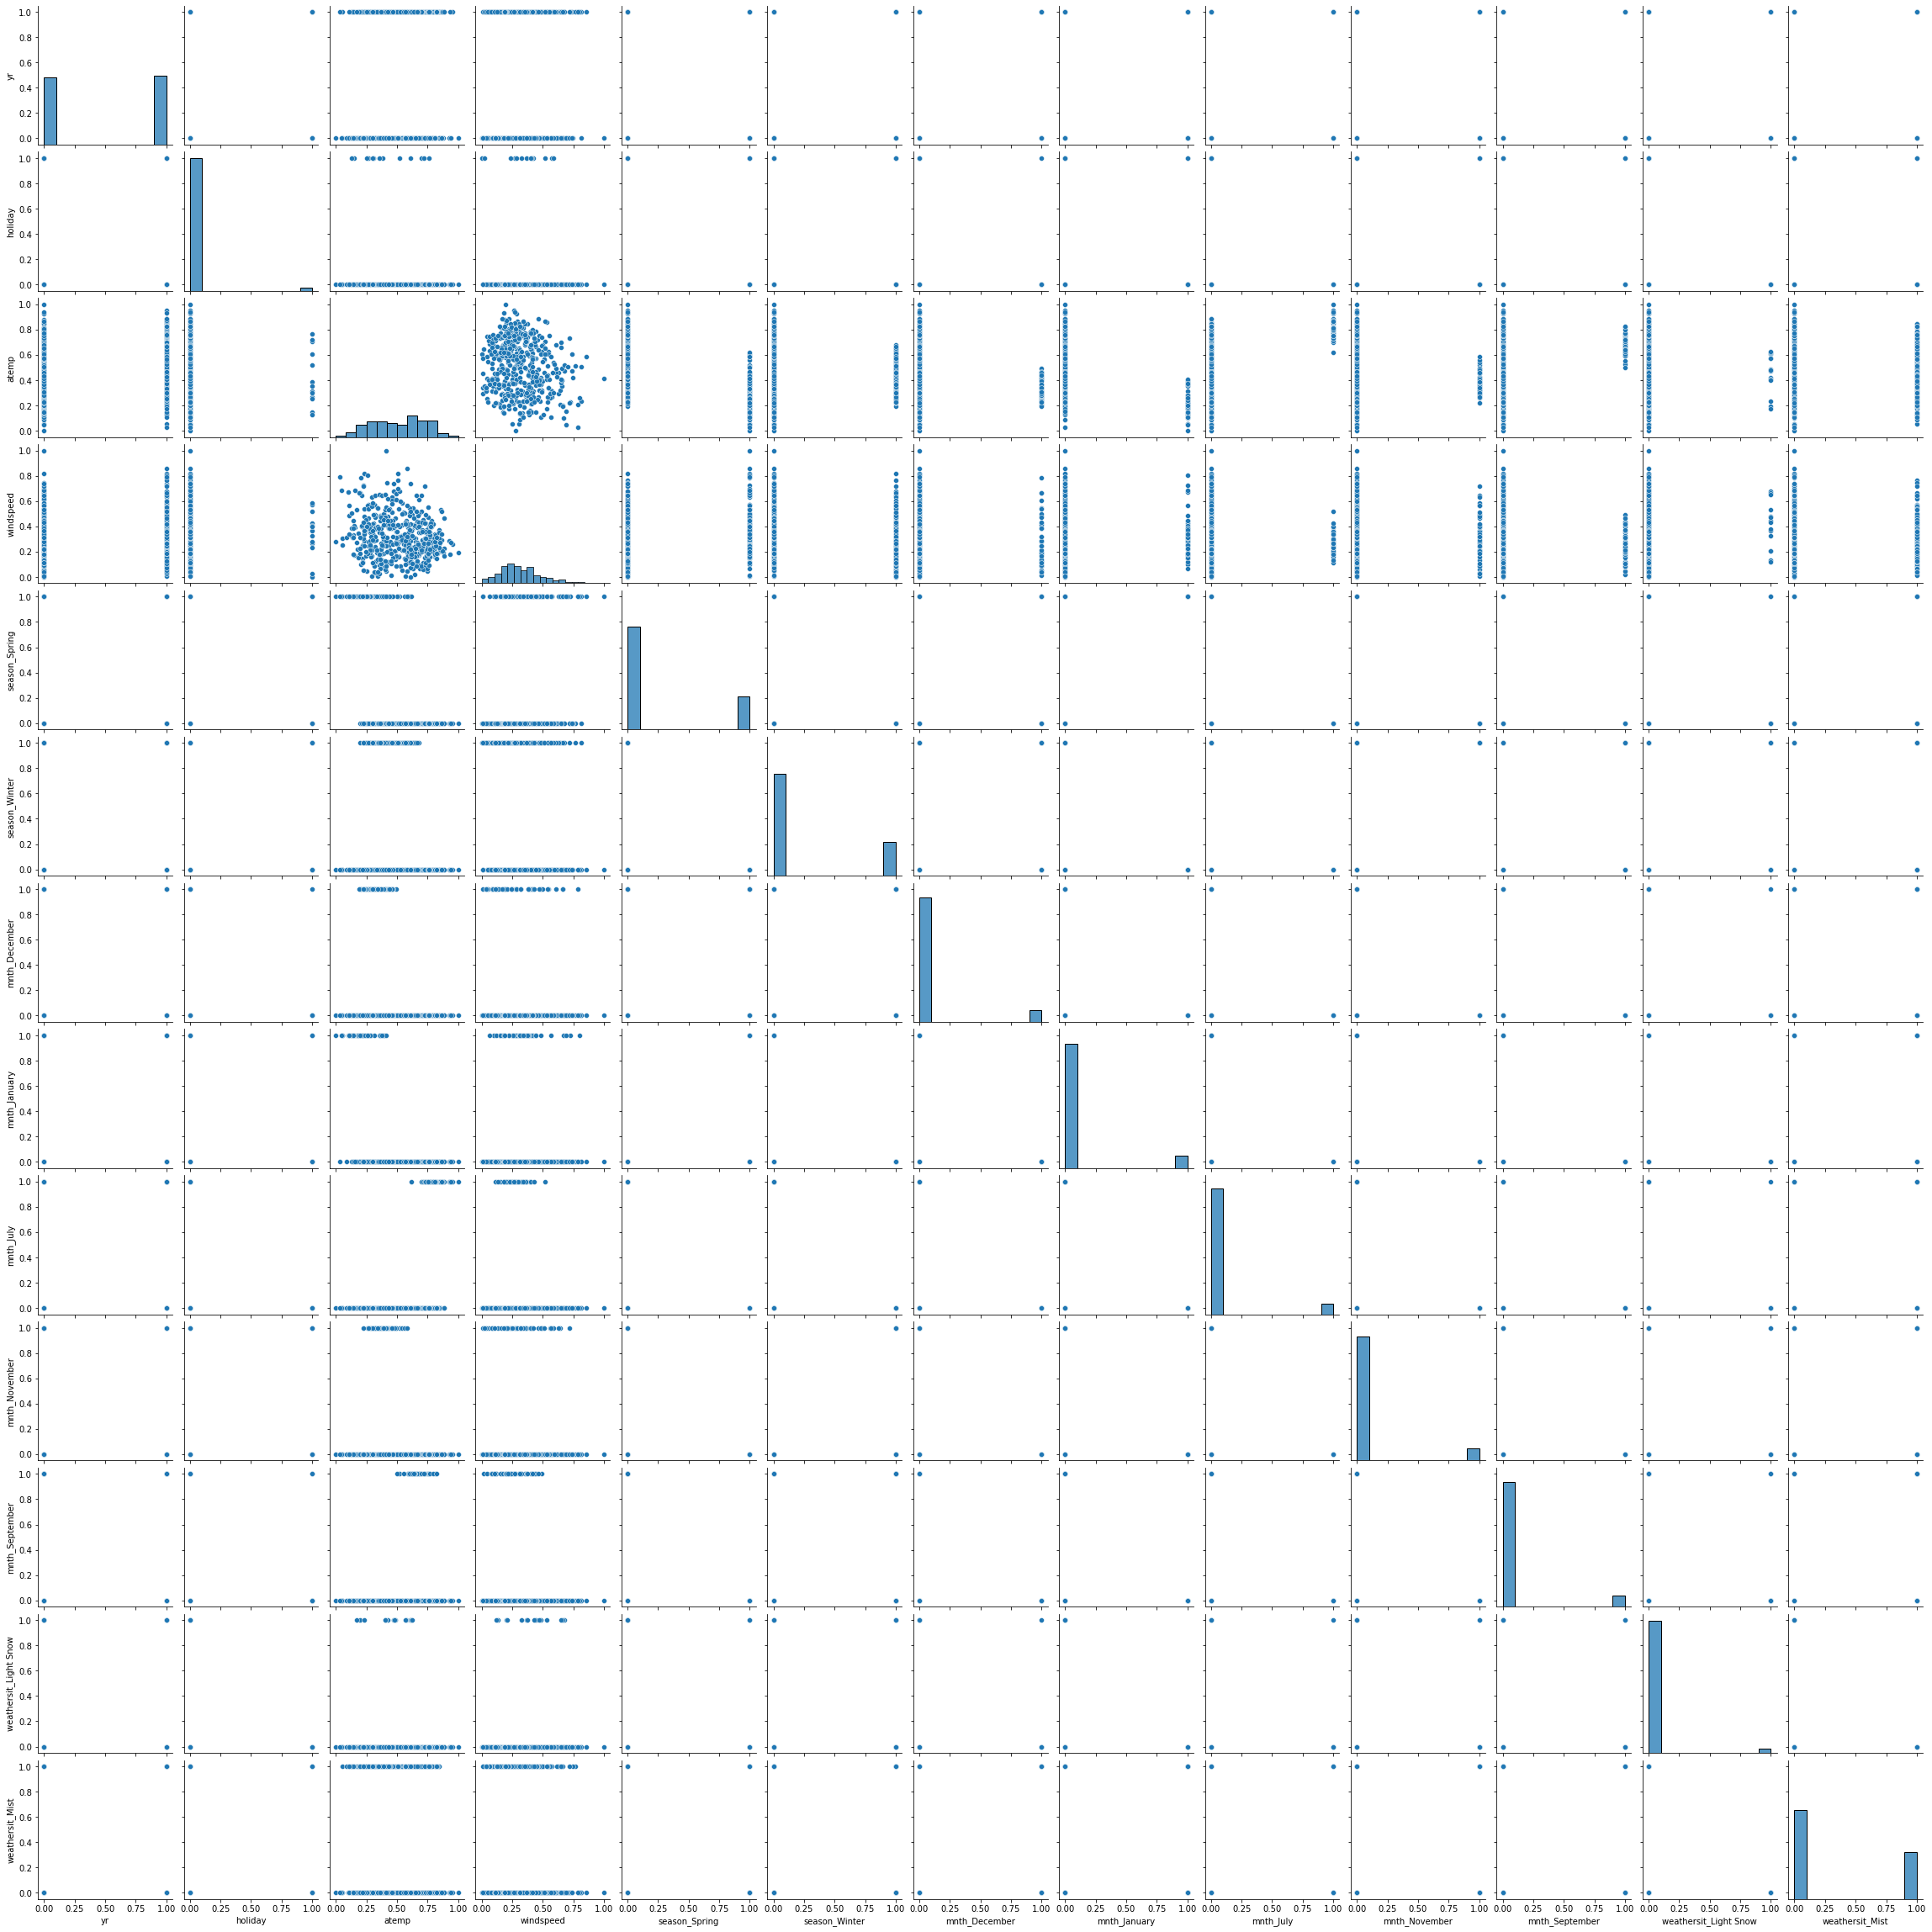

In [33]:
#Checking the if there is any linearity between variables and cnt to verify if a Liner Regression model can be used

sns.pairplot(x_train_new)
plt.show()

There is no clear relationship between any of the variable , so there is no multicolinearity that exists

# Making Predictions using the Final Model

In [34]:
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
boombikes_test[num_vars]= scaler.transform(boombikes_test[num_vars])
boombikes_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [35]:
# dividing into x and y

y_test = boombikes_test.pop('cnt')
x_test = boombikes_test

In [36]:
#Dropping variables which are not in the final model
x_test_new = x_test[x_train_new.columns]

#Adding a constant variable
x_test_new = sm.add_constant(x_test_new)

#Making predictions using Final Model
y_test_pred = lm.predict(x_test_new)


# Model Evaluation

Text(0, 0.5, 'y_test_pred')

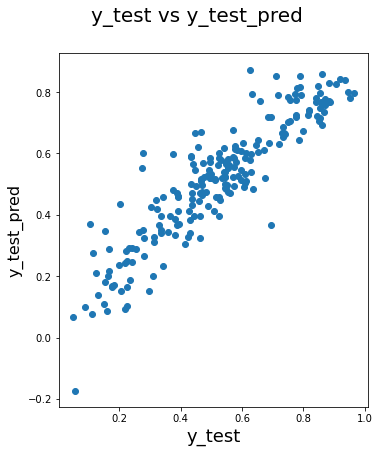

In [37]:
#Visualizing y_test and y_test_pred
fig= plt.figure()
fig.set_size_inches(18.5, 6.5, forward=True)
ax = fig.add_subplot(111, aspect='equal')
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)

In [38]:
# R-squared value for final model on test set

r2=r2_score(y_test,y_test_pred)
print(r2)

0.8179669424739717


In [39]:
# Adjusted R-squared value for final model on test set

Adj_r2= 1-(1-r2)*((boombikes_test.shape[0]-1)/(boombikes_test.shape[0]-10-1))
print(Adj_r2)

0.8092153531698357


## R-squared is 83.6% in train set and 81.8% on test set
## Adjusted R-squared is 83.2% in train set and 80.9% in test set

### These values are acceptable and hence we can say that the model is best!

## Inferences obtained from above:

### 1.   Count of total rental bikes (cnt) in year 2019 is 23.5% higher than that in 2018
### 2.   Cnt is 8.8% lower during the holidays
### 3.   Unit increase in feeling temperature increases cnt by 41.2%
### 4.   Unit increase in windspeed decreases cnt by 14.2%
### 5.   Cnt is 10.9% lower in Spring
### 6.   Cnt is 5.8% higher in Winter season
### 7.   Cnt is 5.3% lower in the month of December
### 8.   Cnt is 5.6% higher in the month of January
### 9.   Cnt is 5.9% lower in the month of July
### 10.   Cnt is 5.0% lower in the month of November
### 11. Cnt is 5.5% higher in month of September
### 12.   Cnt is 29.1% lower when there is light snow or rain
### 13. Cnt is 8.2% lower when the weather is misty and cloudy